# Stack Overflow

## Introduction 

In this assignment, we will use some posts on Stack Overflow during the year of 2015 and measure the similarity of  users by looking at their answers' score. In order to get a full grade, do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and is due on **February 2** at **7pm**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs). You might need to install the *requests* library and an easy way to do so is by using the command [pip](https://docs.python.org/3/installing/index.html).

In [2]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)
type(response)

<Response [200]>


requests.models.Response

Now, object *response* contains the raw text of posts from the first day of 2015. 
Note that all dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [4]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":262,"user_id":3210431,"user_type":"registered","accept_rate":76,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"https://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":247,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"https://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":969,"answer_count":1,"score":1,"last_activity_dat

It is not possible to read the raw response. Instead, we need to decode the raw response as **JSON** and use the `json` library to print it. JavaScript Object Notation (JSON) is a standard text-based format for representing structured data based on JavaScript object syntax, which is commonly used for representing and transmitting data on web sites. More documentation on json objects can be found [here](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON) 

In [5]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=2))

{
  "items": [
    {
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "owner": {
        "reputation": 262,
        "user_id": 3210431,
        "user_type": "registered",
        "accept_rate": 76,
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "display_name": "salep",
        "link": "https://stackoverflow.com/users/3210431/salep"
      },
      "is_answered": true,
      "view_count": 247,
      "accepted_answer_id": 27727478,
      "answer_count": 2,
      "score": 0,
      "last_activity_date": 1420071815,
      "creation_date": 1420070458,
      "question_id": 27727385,
      "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "title": "Inserting multiple records into MySQL from an array"
    },
    {
      "tags": [
        "apache-pig"
      ],
      "owner": {
        "reputation": 6,
        "user_id": 868779,
        "user_type": "r

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates and whether the question was answered. Your solution should be in the form **(creation_date,is_answered)**. Notice that a JSON object is basically a dictionary. **(2 pts)**

In [7]:
def print_creation_dates_json(response):
    """
    Prints the creation_date of all the questions in the response.

    Parameters:
        response: Response object
    """
    json_response = response.json()
    for item in json_response['items']:
        temp_tuple = (
            datetime.fromtimestamp(int(item['creation_date'])).strftime('%Y-%m-%d %H:%M:%S'),
            item['is_answered'])
        print(temp_tuple)

Write the code that calls the ```print_creation_dates_is_answered_json()``` function to print out **all** the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). This means that after getting a request, you will need to wait for some seconds before making a new request. If you do not do that, stack exchange will block you from making any new requests. **(1 pts)**

In [11]:
def print_creation_dates_is_answered_json():
    """
    """
    start_time = 1420070400  # 01-01-2015 at 00:00:00
    end_time = 1420156800  # 01-02-2015 at 00:00:00
    page = 1
    response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                            "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                            "&order=asc&sort=creation&site=stackoverflow")
    print_creation_dates_json(response)
    while (response.json()["has_more"]):
        page += 1
        response = requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(page) + "&pagesize=100" +
                                "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                                "&order=asc&sort=creation&site=stackoverflow")
        print_creation_dates_json(response)
    
    
print_creation_dates_is_answered_json()

('2014-12-31 19:00:58', True)
('2014-12-31 19:01:43', False)
('2014-12-31 19:02:32', True)
('2014-12-31 19:02:57', True)
('2014-12-31 19:03:31', True)
('2014-12-31 19:04:01', False)
('2014-12-31 19:05:03', False)
('2014-12-31 19:05:27', True)
('2014-12-31 19:05:34', True)
('2014-12-31 19:06:17', False)
('2014-12-31 19:06:41', True)
('2014-12-31 19:07:28', True)
('2014-12-31 19:07:39', True)
('2014-12-31 19:07:46', False)
('2014-12-31 19:09:28', True)
('2014-12-31 19:10:05', False)
('2014-12-31 19:10:29', True)
('2014-12-31 19:11:43', True)
('2014-12-31 19:12:02', True)
('2014-12-31 19:12:55', True)
('2014-12-31 19:13:04', False)
('2014-12-31 19:13:32', False)
('2014-12-31 19:13:50', False)
('2014-12-31 19:15:40', True)
('2014-12-31 19:17:11', True)
('2014-12-31 19:18:50', True)
('2014-12-31 19:22:16', False)
('2014-12-31 19:23:14', True)
('2014-12-31 19:23:50', True)
('2014-12-31 19:24:28', False)
('2014-12-31 19:25:07', True)
('2014-12-31 19:25:29', True)
('2014-12-31 19:25:39', True)

('2014-12-31 23:50:41', True)
('2014-12-31 23:50:51', True)
('2014-12-31 23:51:00', True)
('2014-12-31 23:51:19', True)
('2014-12-31 23:51:51', True)
('2014-12-31 23:53:10', True)
('2014-12-31 23:54:17', True)
('2014-12-31 23:54:47', True)
('2014-12-31 23:56:06', True)
('2014-12-31 23:56:08', True)
('2014-12-31 23:57:05', False)
('2014-12-31 23:57:34', False)
('2014-12-31 23:58:30', True)
('2014-12-31 23:58:51', True)
('2014-12-31 23:59:31', True)
('2015-01-01 00:00:16', True)
('2015-01-01 00:01:19', True)
('2015-01-01 00:01:28', True)
('2015-01-01 00:01:48', True)
('2015-01-01 00:02:19', True)
('2015-01-01 00:06:24', True)
('2015-01-01 00:07:05', False)
('2015-01-01 00:08:42', False)
('2015-01-01 00:09:25', False)
('2015-01-01 00:12:54', False)
('2015-01-01 00:13:25', True)
('2015-01-01 00:14:00', False)
('2015-01-01 00:15:31', True)
('2015-01-01 00:16:31', True)
('2015-01-01 00:17:22', False)
('2015-01-01 00:19:33', False)
('2015-01-01 00:19:52', True)
('2015-01-01 00:20:34', True)
(

('2015-01-01 03:33:55', True)
('2015-01-01 03:35:13', True)
('2015-01-01 03:36:50', True)
('2015-01-01 03:37:03', True)
('2015-01-01 03:37:49', False)
('2015-01-01 03:38:21', False)
('2015-01-01 03:38:50', True)
('2015-01-01 03:39:25', False)
('2015-01-01 03:39:31', False)
('2015-01-01 03:39:43', True)
('2015-01-01 03:39:49', True)
('2015-01-01 03:40:19', False)
('2015-01-01 03:40:47', False)
('2015-01-01 03:41:06', False)
('2015-01-01 03:41:36', True)
('2015-01-01 03:41:55', True)
('2015-01-01 03:42:04', False)
('2015-01-01 03:42:06', False)
('2015-01-01 03:42:17', False)
('2015-01-01 03:43:20', True)
('2015-01-01 03:43:50', True)
('2015-01-01 03:45:00', True)
('2015-01-01 03:45:05', False)
('2015-01-01 03:45:36', True)
('2015-01-01 03:45:48', True)
('2015-01-01 03:47:07', True)
('2015-01-01 03:47:50', False)
('2015-01-01 03:48:26', False)
('2015-01-01 03:50:01', False)
('2015-01-01 03:50:57', True)
('2015-01-01 03:51:14', False)
('2015-01-01 03:52:25', True)
('2015-01-01 03:52:28', F

('2015-01-01 06:27:49', True)
('2015-01-01 06:28:18', True)
('2015-01-01 06:30:07', True)
('2015-01-01 06:30:47', True)
('2015-01-01 06:31:26', True)
('2015-01-01 06:31:56', True)
('2015-01-01 06:32:01', True)
('2015-01-01 06:32:09', False)
('2015-01-01 06:32:13', True)
('2015-01-01 06:33:12', False)
('2015-01-01 06:33:28', False)
('2015-01-01 06:34:15', True)
('2015-01-01 06:34:40', False)
('2015-01-01 06:34:55', True)
('2015-01-01 06:35:01', True)
('2015-01-01 06:35:06', False)
('2015-01-01 06:36:07', False)
('2015-01-01 06:36:11', True)
('2015-01-01 06:36:28', False)
('2015-01-01 06:36:58', False)
('2015-01-01 06:37:20', True)
('2015-01-01 06:37:20', True)
('2015-01-01 06:37:39', True)
('2015-01-01 06:37:41', True)
('2015-01-01 06:38:23', False)
('2015-01-01 06:38:27', False)
('2015-01-01 06:41:44', True)
('2015-01-01 06:41:57', True)
('2015-01-01 06:42:17', True)
('2015-01-01 06:42:55', True)
('2015-01-01 06:43:16', False)
('2015-01-01 06:43:47', False)
('2015-01-01 06:43:48', True

('2015-01-01 08:40:19', True)
('2015-01-01 08:40:30', False)
('2015-01-01 08:41:20', True)
('2015-01-01 08:42:10', True)
('2015-01-01 08:42:12', False)
('2015-01-01 08:42:47', True)
('2015-01-01 08:44:43', True)
('2015-01-01 08:45:12', True)
('2015-01-01 08:45:46', False)
('2015-01-01 08:45:48', True)
('2015-01-01 08:46:11', False)
('2015-01-01 08:47:35', True)
('2015-01-01 08:47:35', True)
('2015-01-01 08:47:44', True)
('2015-01-01 08:47:56', True)
('2015-01-01 08:47:57', False)
('2015-01-01 08:48:05', False)
('2015-01-01 08:48:35', True)
('2015-01-01 08:48:46', True)
('2015-01-01 08:48:57', True)
('2015-01-01 08:49:09', True)
('2015-01-01 08:50:28', True)
('2015-01-01 08:50:42', True)
('2015-01-01 08:50:54', True)
('2015-01-01 08:50:57', True)
('2015-01-01 08:51:07', True)
('2015-01-01 08:51:13', True)
('2015-01-01 08:52:13', True)
('2015-01-01 08:52:15', True)
('2015-01-01 08:52:29', True)
('2015-01-01 08:53:21', True)
('2015-01-01 08:53:27', False)
('2015-01-01 08:53:46', True)
('2

('2015-01-01 10:51:49', True)
('2015-01-01 10:52:20', False)
('2015-01-01 10:52:58', False)
('2015-01-01 10:53:05', True)
('2015-01-01 10:53:06', False)
('2015-01-01 10:53:19', True)
('2015-01-01 10:54:04', False)
('2015-01-01 10:54:23', True)
('2015-01-01 10:55:40', True)
('2015-01-01 10:56:54', False)
('2015-01-01 10:57:38', True)
('2015-01-01 10:57:39', True)
('2015-01-01 10:57:41', True)
('2015-01-01 10:58:20', False)
('2015-01-01 10:58:34', True)
('2015-01-01 10:58:35', True)
('2015-01-01 10:58:45', True)
('2015-01-01 10:59:00', False)
('2015-01-01 10:59:16', False)
('2015-01-01 10:59:30', True)
('2015-01-01 10:59:44', True)
('2015-01-01 10:59:49', True)
('2015-01-01 11:00:18', True)
('2015-01-01 11:00:42', True)
('2015-01-01 11:00:46', True)
('2015-01-01 11:01:47', True)
('2015-01-01 11:02:47', True)
('2015-01-01 11:02:58', True)
('2015-01-01 11:03:01', True)
('2015-01-01 11:03:12', True)
('2015-01-01 11:04:14', True)
('2015-01-01 11:04:31', False)
('2015-01-01 11:04:56', True)
(

('2015-01-01 13:01:09', False)
('2015-01-01 13:01:27', False)
('2015-01-01 13:01:31', False)
('2015-01-01 13:01:43', True)
('2015-01-01 13:02:04', True)
('2015-01-01 13:02:11', True)
('2015-01-01 13:02:18', True)
('2015-01-01 13:03:05', True)
('2015-01-01 13:03:55', False)
('2015-01-01 13:04:23', True)
('2015-01-01 13:04:45', False)
('2015-01-01 13:04:50', True)
('2015-01-01 13:05:41', True)
('2015-01-01 13:05:53', False)
('2015-01-01 13:06:01', False)
('2015-01-01 13:06:52', False)
('2015-01-01 13:06:56', True)
('2015-01-01 13:07:27', True)
('2015-01-01 13:07:54', False)
('2015-01-01 13:08:09', True)
('2015-01-01 13:08:12', True)
('2015-01-01 13:08:21', True)
('2015-01-01 13:08:22', True)
('2015-01-01 13:08:28', False)
('2015-01-01 13:09:24', False)
('2015-01-01 13:11:13', True)
('2015-01-01 13:12:05', False)
('2015-01-01 13:12:07', False)
('2015-01-01 13:12:44', True)
('2015-01-01 13:13:48', True)
('2015-01-01 13:14:49', True)
('2015-01-01 13:14:55', True)
('2015-01-01 13:15:16', Tru

('2015-01-01 15:00:46', True)
('2015-01-01 15:01:51', True)
('2015-01-01 15:01:53', True)
('2015-01-01 15:02:09', True)
('2015-01-01 15:02:47', False)
('2015-01-01 15:02:51', True)
('2015-01-01 15:03:33', False)
('2015-01-01 15:04:20', False)
('2015-01-01 15:04:30', True)
('2015-01-01 15:04:46', False)
('2015-01-01 15:04:57', True)
('2015-01-01 15:05:49', True)
('2015-01-01 15:06:01', True)
('2015-01-01 15:06:16', True)
('2015-01-01 15:06:20', True)
('2015-01-01 15:06:22', False)
('2015-01-01 15:06:28', True)
('2015-01-01 15:06:37', False)
('2015-01-01 15:07:02', True)
('2015-01-01 15:07:17', True)
('2015-01-01 15:08:08', True)
('2015-01-01 15:08:28', True)
('2015-01-01 15:09:08', True)
('2015-01-01 15:09:10', True)
('2015-01-01 15:09:20', True)
('2015-01-01 15:09:47', True)
('2015-01-01 15:10:34', True)
('2015-01-01 15:11:17', True)
('2015-01-01 15:11:53', True)
('2015-01-01 15:12:08', True)
('2015-01-01 15:12:18', True)
('2015-01-01 15:12:37', True)
('2015-01-01 15:12:40', True)
('20

('2015-01-01 17:05:13', True)
('2015-01-01 17:06:07', True)
('2015-01-01 17:06:15', True)
('2015-01-01 17:06:40', True)
('2015-01-01 17:06:45', True)
('2015-01-01 17:07:19', True)
('2015-01-01 17:07:59', True)
('2015-01-01 17:09:04', False)
('2015-01-01 17:09:14', True)
('2015-01-01 17:09:32', True)
('2015-01-01 17:09:47', True)
('2015-01-01 17:10:23', True)
('2015-01-01 17:10:46', False)
('2015-01-01 17:12:17', False)
('2015-01-01 17:12:34', True)
('2015-01-01 17:12:49', True)
('2015-01-01 17:13:30', True)
('2015-01-01 17:14:13', True)
('2015-01-01 17:14:32', True)
('2015-01-01 17:14:57', True)
('2015-01-01 17:15:22', True)
('2015-01-01 17:15:24', False)
('2015-01-01 17:16:01', True)
('2015-01-01 17:16:39', True)
('2015-01-01 17:16:43', True)
('2015-01-01 17:17:09', True)
('2015-01-01 17:17:58', False)
('2015-01-01 17:18:25', True)
('2015-01-01 17:18:32', True)
('2015-01-01 17:18:38', True)
('2015-01-01 17:18:42', True)
('2015-01-01 17:20:04', True)
('2015-01-01 17:20:05', True)
('201

Due to time constraints, we have downloaded the [data dump](https://drive.google.com/a/bu.edu/file/d/0BzeSDLWpnNHxaEd5XzhIZ2tJMlU/view?usp=sharing) for Stack Overflow's posts in 2015. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. Your solution should work with the whole dataset.

Do not commit the data file to your github. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions and answers posted in 2015. Questions are posts with `PostTypeId=1` and answers are posts with `PostTypeId=2`. Then: 
1. Make a `pandas DataFrame` with the following 9 columns: `Id`, `CreationDate`, `OwnerUserId`, the first tag in `Tags`, `Score`, `ViewCount`,`AnswerCount`,`ParentId`,`Type`. Note that the first 5 columns are common for both questions and answers, the following 2 columns are only identified in questions and the next column in answers. Finally column `Type` is used show whether the row of the data frame corresponds to a question or answer. You can assign 'Q' for question and 'A' for answer to this column. Also, if you do not have a value for a column, for instance an answer does not have a view count, then simply add None as a value.   
2. Print out the time required to parse the questions (data file).
3. Print out the DataFrame.
4. Do not clear the output. 
**(3 pts)**

Some hints/library you might find useful are the following:
1. One library you can use to parse the large .xml file is the `xml.etree.ElementTree` library. More documentation can be found [here](https://docs.python.org/2/library/xml.etree.elementtree.html).
2. Due to the required parsing time, it is strongly recommended that you write the parsed data in another file on the disk. Thus, even if something goes wrong you will always have these data to work with, which will give you partial credit.
3. Before traversing the whole dataset, play with a small subset first in order to construct your solution fast.


In [1]:
# File imports
import xml.etree.cElementTree as ET
import re
import csv
import pandas as pd
import time

In [2]:
def xml_to_csv(file_path):
    """

    :param file_path:
    :return:
    """
    tree = ET.iterparse(file_path, events=('end',))

    headers = ['Id', 'CreationDate', 'OwnerUserId', 'Tags', 'Score', 'ViewCount', 'AnswerCount', 'ParentId', 'Type']

    with open('result.csv', 'w', newline='') as f:
        writer = csv.DictWriter(f, headers)
        writer.writeheader()

    for event, element in tree:
        item = element.attrib
        # print(item)
        result = {
            'Id': '',
            'CreationDate': '',
            'OwnerUserId': '',
            'Tags': '',
            'Score': '',
            'ViewCount': '',
            'AnswerCount': '',
            'ParentId': '',
            'Type': ''
        }

        if 'PostTypeId' in item:
            post_type_id = item['PostTypeId']
        else:
            continue

        if 'Id' in item:
            result['Id'] = item['Id']
        if 'CreationDate' in item:
            result['CreationDate'] = item['CreationDate']
        if 'OwnerUserId' in item:
            result['OwnerUserId'] = item['OwnerUserId']
        if 'Tags' in item:
            tags = re.split('<|>', item['Tags'])
            # print(tags[1])
            result['Tags'] = tags[1]
        if 'Score' in item:
            result['Score'] = item['Score']

        if post_type_id == '1':
            # print(item)
            if 'ViewCount' in item:
                result['ViewCount'] = item['ViewCount']
            if 'AnswerCount' in item:
                result['AnswerCount'] = item['AnswerCount']
            result['Type'] = 'Q'
        elif post_type_id == '2':
            if 'ParentId' in item:
                result['ParentId'] = item['ParentId']
            result['Type'] = 'A'
            # print(item)

        element.clear()

        # print(result)

        # temp_df = pd.DataFrame(result)
        # print(temp_df)
        # df = df.append(temp_df, ignore_index=True)
        # print(df)
        # print(post_type_id)
        with open('result.csv', 'a+', newline='') as f:
            writer = csv.DictWriter(f, headers)
            writer.writerow(result)

    # df = pd.read_csv('./result.csv')
    return None


start_time = time.time()
xml_to_csv('./stackoverflow-posts-2015.xml')
end_time = time.time()
parse_time = end_time - start_time
print('Time needed to parse the xml file: ' + str(parse_time))


df = pd.read_csv('./result.csv')
print(df)

Time needed to parse the xml file: 1128.2947976589203
               Id             CreationDate  OwnerUserId            Tags  \
0        27727381  2015-01-01T00:00:27.040    1971096.0             NaN   
1        27727382  2015-01-01T00:00:31.240    2410359.0             NaN   
2        27727384  2015-01-01T00:00:50.550    1366219.0             NaN   
3        27727385  2015-01-01T00:00:58.253    3210431.0             php   
4        27727387  2015-01-01T00:01:43.597    3886175.0             NaN   
5        27727388  2015-01-01T00:01:43.673     868779.0      apache-pig   
6        27727389  2015-01-01T00:02:02.050    3925941.0             NaN   
7        27727390  2015-01-01T00:02:30.233    1004312.0             NaN   
8        27727391  2015-01-01T00:02:32.123    4372672.0             ios   
9        27727393  2015-01-01T00:02:57.983    2482149.0      sql-server   
10       27727394  2015-01-01T00:03:31.337    4263870.0             php   
11       27727396  2015-01-01T00:04:01.407    

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the highest total answer scores. That is, you need to compute for each user the sum of the answer scores that he has received, for all answers that he has provided.

Compare the users based on the types of questions they answer. We will categorize a question by its first tag, so eventually the features of the user will comprise the first tag of each question that he has answered. You may choose to implement any one of the similarity/distance measures we discussed in class. **(2pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [1]:
def top_user_similarity(file_path):
    """

    :param file_path:
    :return:
    """
    df = pd.read_csv(file_path)
    answer_df = df[df.Type.isin(['A'])]
    question_df = df[df.Type.isin(['Q'])]
    # print(df)
    grouped = answer_df.groupby(['OwnerUserId']).Score.sum().sort_values(ascending=False).to_frame()
    top_user_id_list = grouped.index.tolist()[0:100]
    # top_user_id_list = [22656.0, 1144035.0, 100297.0, 3732271.0, 1221571.0, 157247.0, 335858.0, 548225.0, 2069064.0, 3297613.0, 2141635.0, 1491895.0, 3832970.0, 505088.0, 434551.0, 2173917.0, 115145.0, 6309.0, 19068.0, 114251.0, 771848.0, 560648.0, 2025923.0, 992484.0, 17034.0, 2422776.0, 795990.0, 4856258.0, 341994.0, 1187415.0, 1870803.0, 3001626.0, 571407.0, 1708801.0, 284240.0, 816620.0, 1048572.0, 522444.0, 2867928.0, 496161.0, 204847.0, 2756719.0, 2877241.0, 949476.0, 3933332.0, 440558.0, 2680216.0, 131872.0, 1743880.0, 589924.0, 519413.0, 1903116.0, 155423.0, 462627.0, 2296458.0, 2455888.0, 1009479.0, 2435473.0, 218196.0, 1707091.0, 993547.0, 65863.0, 14860.0, 1774667.0, 2380830.0, 1505939.0, 2970947.0, 3293881.0, 1705598.0, 1782465.0, 104349.0, 15168.0, 3250829.0, 3679490.0, 1529630.0, 157882.0, 1501794.0, 85371.0, 2711488.0, 661519.0, 1159478.0, 704848.0, 190597.0, 1983495.0, 1903366.0, 841108.0, 1566221.0, 4301306.0, 276052.0, 613130.0, 2586922.0, 57695.0, 438154.0, 2606013.0, 981959.0, 69083.0, 139985.0, 5070879.0, 1064245.0, 2372064.0]
    # print(top_user_id_list)

    # print(df[(df['OwnerUserId'] == 22656.0)].ParentId.tolist())
    question_id_dict = dict()
    for user_id in top_user_id_list:
        question_id_dict[user_id] = answer_df[(answer_df['OwnerUserId'] == user_id)].ParentId.tolist()

    question_tag_dict = dict()
    for user_id in top_user_id_list:
        for question_id in question_id_dict[user_id]:
            if question_id not in question_tag_dict:
                question_tag_dict[question_id] = question_df[(question_df['Id'] == question_id)].Tags.tolist()
                # print(question_tag_dict[question_id])
    # print(question_tag_dict)

    user_tag_dict = dict()
    for user_id in top_user_id_list:
        user_tag_list = list()
        user_question_list = question_id_dict[user_id]
        for question_id in user_question_list:
            tag = question_tag_dict[question_id]
            user_tag_list.extend(tag)
            user_tag_list = list(set(user_tag_list))
        user_tag_dict[user_id] = user_tag_list
    # pprint(user_tag_dict)
    
    # with open('./user_tag.json', 'r') as f:
        # json_result = json.load(f)
    # print(json_result)
    json_result = user_tag_dict
    print(json_result)
    
    user_similarity = list()
    user_list_out = list()
    user_list_in = list()
    for user_id_out in json_result:
        user_list_out.append(user_id_out)
        tmp_similarity_list = list()
        for user_id_in in json_result:
            user_list_in.append(user_id_in)
        
            out_in_intersection = list(set(json_result[user_id_out]).intersection(set(json_result[user_id_in])))
            out_in_union = list(set(json_result[user_id_out]).union(set(json_result[user_id_in])))
            
            jaccard_similarity = (len(out_in_intersection)) / (len(out_in_union))
            
            tmp_similarity_list.append(jaccard_similarity)
        
        user_similarity.append(tmp_similarity_list)
    
    return user_similarity, user_list_out, user_list_in


user_similarity, user_list_out, user_list_in = top_user_similarity('./posts.csv')

NameError: name 'pd' is not defined

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(1 pts)**

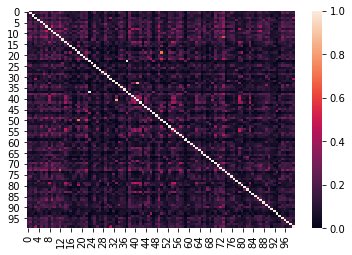

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns


def plot_heat_map(user_similarity):
    """

    :param user_similarity:
    :return:
    """
    ax = sns.heatmap(user_similarity)
    plt.show()

    return None


plot_heat_map(user_similarity)

Provide an interpretation of the heatmap's results. **(1 pts)**

1. The Jaccard Similiarity on the diagonal is 1, since they are the same user, $JD(x,x) = 0$.
2. The heatmap is symmetry, since $JD(x,y) = JD(y,x)$.
3. The mean of the top 100 user's similiarity is aroud 0.5.

-----------------